# Visualize results of Roslyn built-in code metrics analyzer

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import os
import json

## Prepare data

Extract values from file

In [184]:
maintainability_index_data = {}
cyclomatic_data = {}
class_coupling_data = {}
loc_data = {}

filepath = "../public_analysis_results.json"
with open(filepath, "r") as file:
    json_object = json.load(file)

    for project_id, versions in json_object.items():
        for version_key, version_data in versions.items():
            # Only process numeric keys (version entries)
            if not version_key.isdigit() or not isinstance(version_data, dict):
                continue

            version_index = int(version_key)

            # Maintainability Index
            if "MaintainabilityIndex" in version_data:
                maintainability_index_data.setdefault(project_id, {})[version_index] = version_data["MaintainabilityIndex"]

            # Cyclomatic Complexity
            if "CyclomaticComplexity" in version_data:
                cyclomatic_data.setdefault(project_id, {})[version_index] = version_data["CyclomaticComplexity"]

            # Class Coupling
            if "ClassCoupling" in version_data:
                class_coupling_data.setdefault(project_id, {})[version_index] = version_data["ClassCoupling"]

            # Lines of Code
            if "SourceLines" in version_data:
                loc_data.setdefault(project_id, {})[version_index] = version_data["SourceLines"]

print("maintainability_index_data =", maintainability_index_data)
print("cyclomatic_data =", cyclomatic_data)
print("class_coupling_data =", class_coupling_data)
print("loc_data =", loc_data)

maintainability_index_data = {'jellyfin_jellyfin': {0: 79, 1: 78, 2: 77, 3: 77, 4: 77, 5: 76, 6: 76}, 'OpenRA_OpenRA': {0: 74, 1: 75, 2: 75, 3: 74}, 'GISLab-ELTE_aegis-origin': {0: 73, 1: 73, 2: 73}}
cyclomatic_data = {'jellyfin_jellyfin': {0: 1011, 1: 1095, 2: 813, 3: 818, 4: 820, 5: 855, 6: 857}, 'OpenRA_OpenRA': {0: 3260, 1: 4257, 2: 4329, 3: 4571}, 'GISLab-ELTE_aegis-origin': {0: 719, 1: 719, 2: 686}}
class_coupling_data = {'jellyfin_jellyfin': {0: 178, 1: 184, 2: 159, 3: 160, 4: 160, 5: 179, 6: 180}, 'OpenRA_OpenRA': {0: 452, 1: 559, 2: 564, 3: 589}, 'GISLab-ELTE_aegis-origin': {0: 79, 1: 79, 2: 77}}
loc_data = {'jellyfin_jellyfin': {0: 164190, 1: 201580, 2: 215140, 3: 216902, 4: 217346, 5: 210004, 6: 210506}, 'OpenRA_OpenRA': {0: 152230, 1: 171673, 2: 175105, 3: 185687}, 'GISLab-ELTE_aegis-origin': {0: 151367, 1: 151367, 2: 155705}}


Convert data

In [185]:
# maintainability_index_data = {k: v for k, v in maintainability_index_data.items() if any(vv != 0 for vv in v.values())}
# df_maintainabilty = pd.DataFrame.from_dict(maintainability_index_data, orient='index')
# df_maintainabilty = df_maintainabilty.sort_index()

# cyclomatic_data = {k: v for k, v in cyclomatic_data.items() if any(vv != 0 for vv in v.values())}
# df_cyclomatic = pd.DataFrame.from_dict(cyclomatic_data, orient='index')
# df_cyclomatic = df_cyclomatic.sort_index()

# class_coupling_data = {k: v for k, v in class_coupling_data.items() if any(vv != 0 for vv in v.values())}
# df_class_coupling = pd.DataFrame.from_dict(class_coupling_data, orient='index')
# df_class_coupling = df_cyclomatic.sort_index()

# Filter out projects where all values are zero (optional cleanup)
maintainability_index_data = {k: v for k, v in maintainability_index_data.items() if any(vv != 0 for vv in v.values())}
cyclomatic_data = {k: v for k, v in cyclomatic_data.items() if any(vv != 0 for vv in v.values())}
class_coupling_data = {k: v for k, v in class_coupling_data.items() if any(vv != 0 for vv in v.values())}
loc_data = {k: v for k, v in loc_data.items() if any(vv != 0 for vv in v.values())}

# Convert to DataFrames
df_maintainability = pd.DataFrame.from_dict(maintainability_index_data, orient='index').sort_index()
df_cyclomatic = pd.DataFrame.from_dict(cyclomatic_data, orient='index').sort_index()
df_class_coupling = pd.DataFrame.from_dict(class_coupling_data, orient='index').sort_index()
df_loc = pd.DataFrame.from_dict(loc_data, orient='index').sort_index()

# Get the minimum LOC value (ignoring zeros to avoid divide-by-zero)
min_loc = df_loc[df_loc > 0].min()

# Calculate a scaling factor for each file: min_LOC / file_LOC
scaling_factors = min_loc / df_loc

# Normalize by LOC (element-wise division)
df_maintainability_normalized = df_maintainability.divide(df_loc / 1000, axis=0)   # .multiply(scaling_factors, axis=0)
df_cyclomatic_normalized = df_cyclomatic.divide(df_loc / 1000, axis=0)
df_class_coupling_normalized = df_class_coupling.divide(df_loc / 1000, axis=0)

# Plot data
## Maintainablity Index
### Bar chart

<Figure size 1000x500 with 0 Axes>

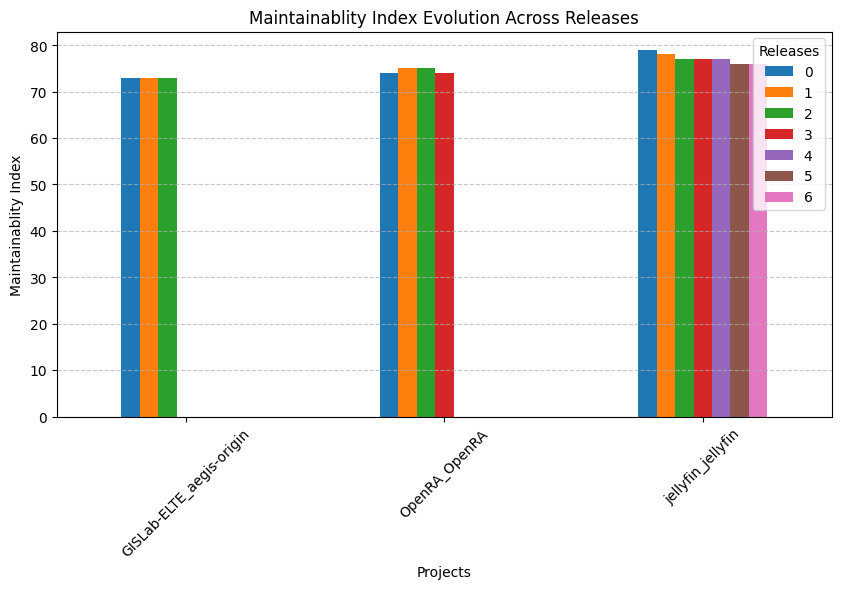

In [186]:
# Plot
plt.figure(figsize=(10, 5))
df_maintainability.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Maintainablity Index")
plt.title("Maintainablity Index Evolution Across Releases")
plt.legend(title="Releases")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Line chart

<Figure size 1200x600 with 0 Axes>

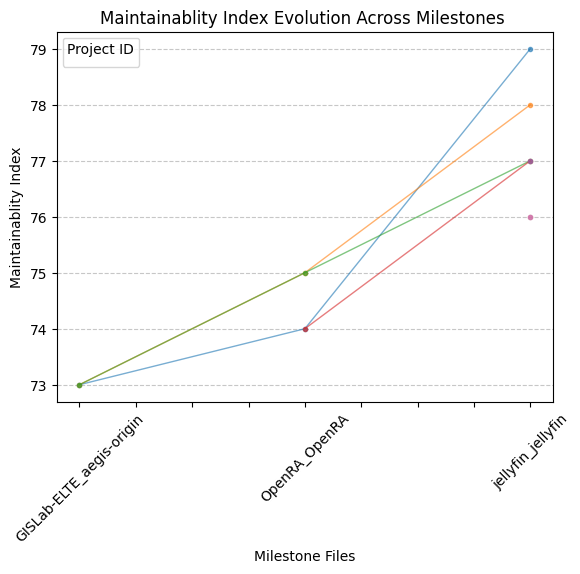

In [187]:
# Plot
plt.figure(figsize=(12, 6))
df_maintainability.plot(kind='line', alpha=0.6, marker='o', markersize=3, linewidth=1)

# Labels and Title
plt.xlabel("Milestone Files")
plt.ylabel("Maintainablity Index")
plt.title("Maintainablity Index Evolution Across Milestones ")
plt.xticks(rotation=45)
plt.legend([], title="Project ID", loc="upper left", fontsize="small")  # Hide legend for too many projects
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Heatmap

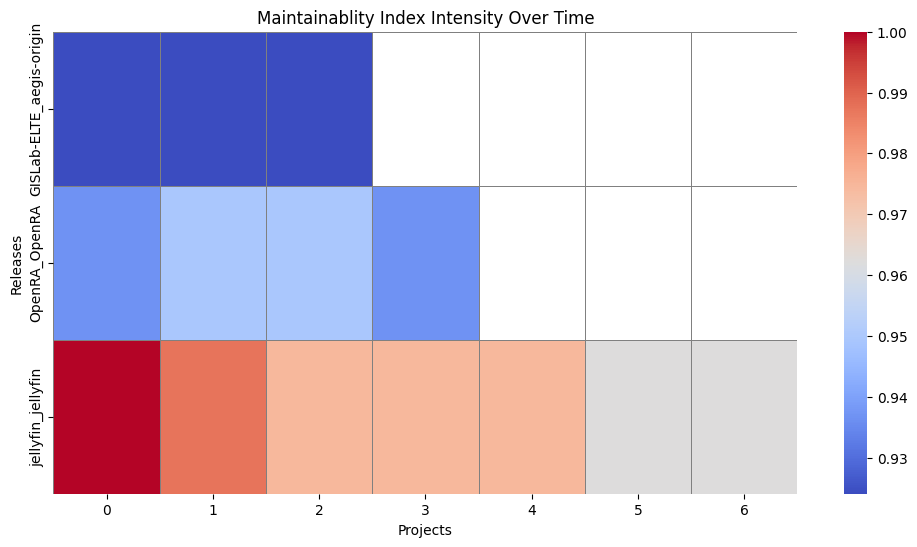

In [188]:
# Normalize values to improve visualization
df_normalized = df_maintainability / df_maintainability.max().max()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_normalized, cmap="coolwarm", linewidths=0.5, linecolor="gray")

# Labels
plt.xlabel("Projects")
plt.ylabel("Releases")
plt.title("Maintainablity Index Intensity Over Time")

# Show plot
plt.show()

### Line chart 2

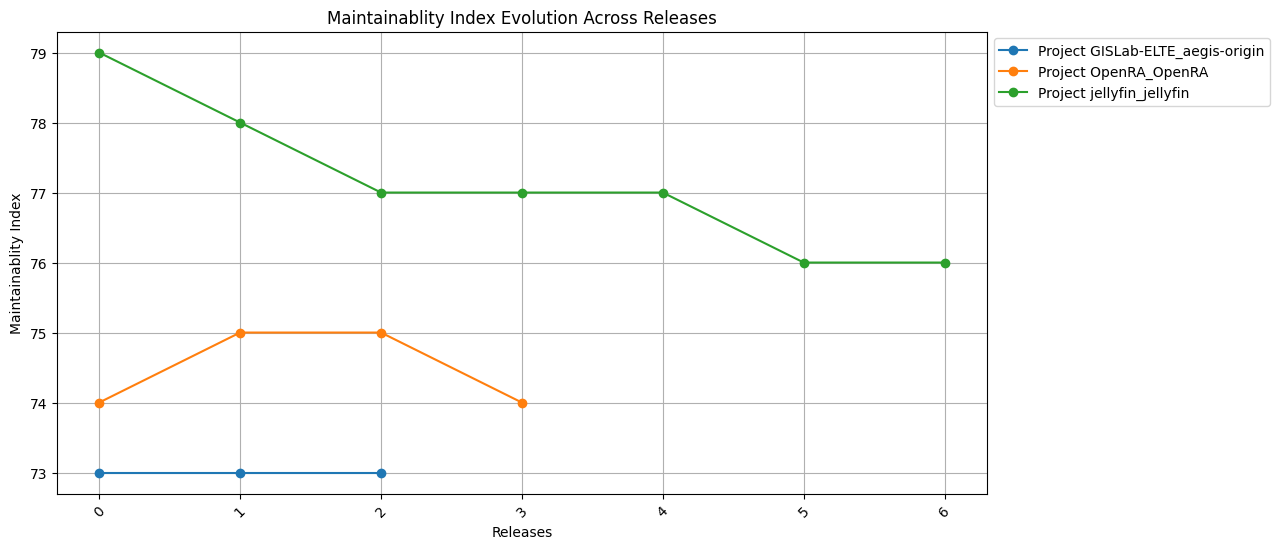

In [189]:
plt.figure(figsize=(12, 6))

for student_id, scores in df_maintainability.iterrows():
    plt.plot(scores.index, scores.values, marker='o', linestyle='-', label=f"Project {student_id}")

plt.xlabel("Releases")
plt.ylabel("Maintainablity Index")
plt.title("Maintainablity Index Evolution Across Releases")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.show()

### Normalized bar chart

<Figure size 1000x500 with 0 Axes>

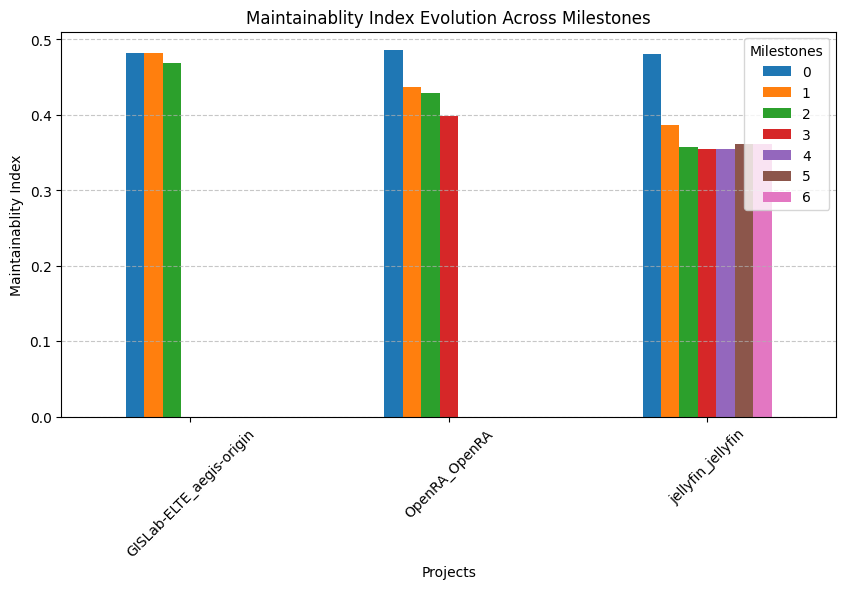

In [190]:
# df_maintainabilty = df_maintainabilty / (df_maintainabilty.max() - df_maintainabilty.min())

# Plot
plt.figure(figsize=(10, 5))
df_maintainability_normalized.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Maintainablity Index")
plt.title("Maintainablity Index Evolution Across Milestones")
plt.legend(title="Milestones")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

## Cyclomatic complexity
### Bar chart

<Figure size 1000x500 with 0 Axes>

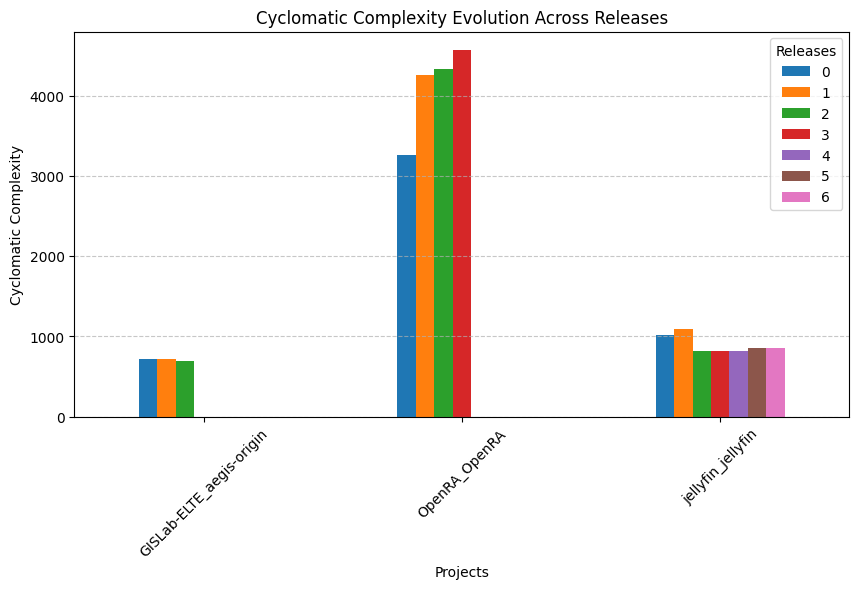

In [191]:
# Plot
plt.figure(figsize=(10, 5))
df_cyclomatic.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Cyclomatic Complexity")
plt.title("Cyclomatic Complexity Evolution Across Releases")
plt.legend(title="Releases")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Line chart

<Figure size 1200x600 with 0 Axes>

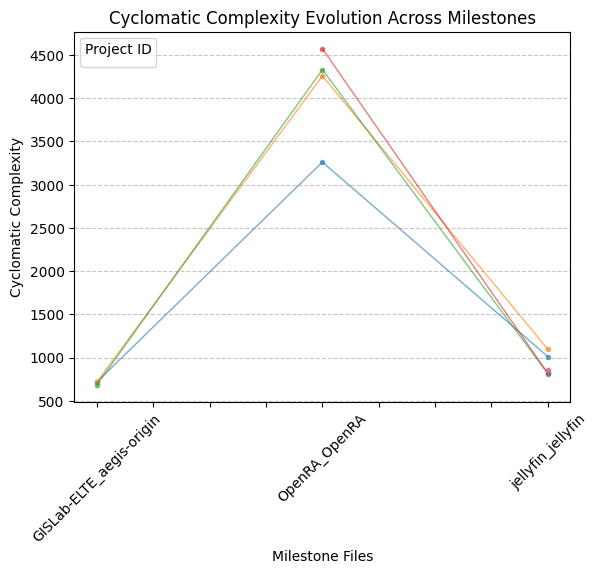

In [192]:
# Plot
plt.figure(figsize=(12, 6))
df_cyclomatic.plot(kind='line', alpha=0.6, marker='o', markersize=3, linewidth=1)

# Labels and Title
plt.xlabel("Milestone Files")
plt.ylabel("Cyclomatic Complexity")
plt.title("Cyclomatic Complexity Evolution Across Milestones")
plt.xticks(rotation=45)
plt.legend([], title="Project ID", loc="upper left", fontsize="small")  # Hide legend for too many projects
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Line chart 2

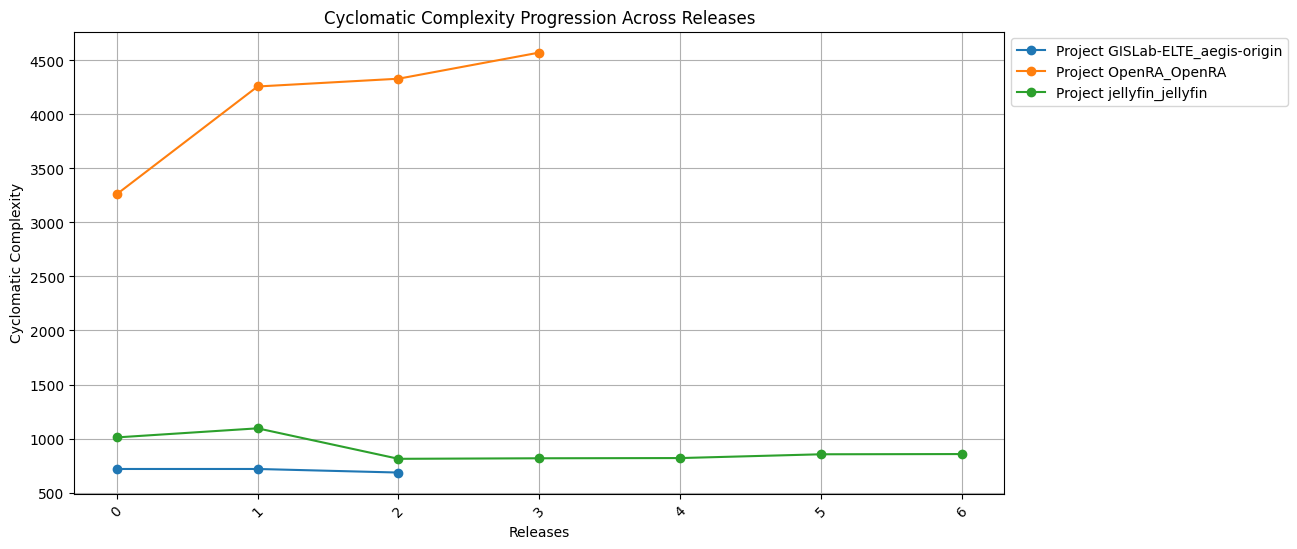

In [193]:
plt.figure(figsize=(12, 6))

for student_id, scores in df_cyclomatic.iterrows():
    plt.plot(scores.index, scores.values, marker='o', linestyle='-', label=f"Project {student_id}")

plt.xlabel("Releases")
plt.ylabel("Cyclomatic Complexity")
plt.title("Cyclomatic Complexity Progression Across Releases")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.show()

### Heatmap

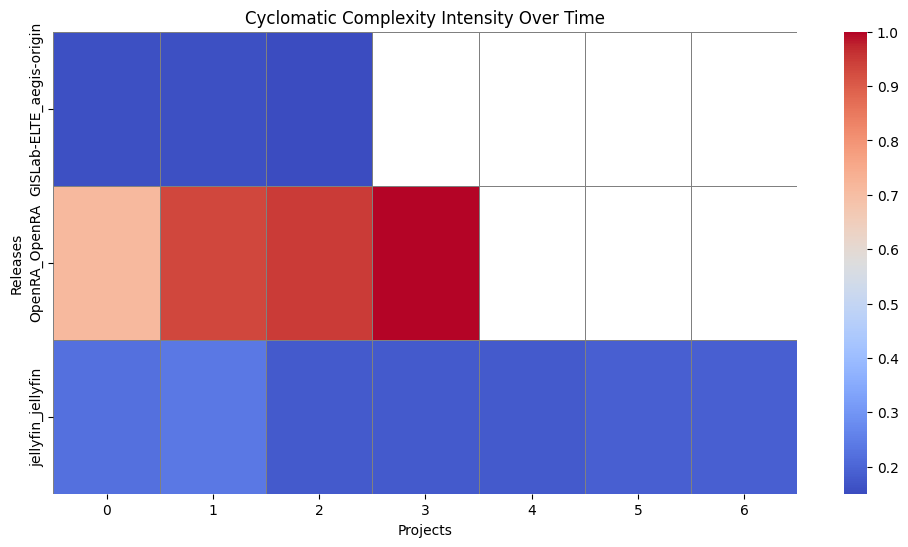

In [194]:
# Normalize values to improve visualization
df_normalized = df_cyclomatic / df_cyclomatic.max().max()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_normalized, cmap="coolwarm", linewidths=0.5, linecolor="gray")

# Labels
plt.xlabel("Projects")
plt.ylabel("Releases")
plt.title("Cyclomatic Complexity Intensity Over Time")

# Show plot
plt.show()

### Normalized bar chart

<Figure size 1000x500 with 0 Axes>

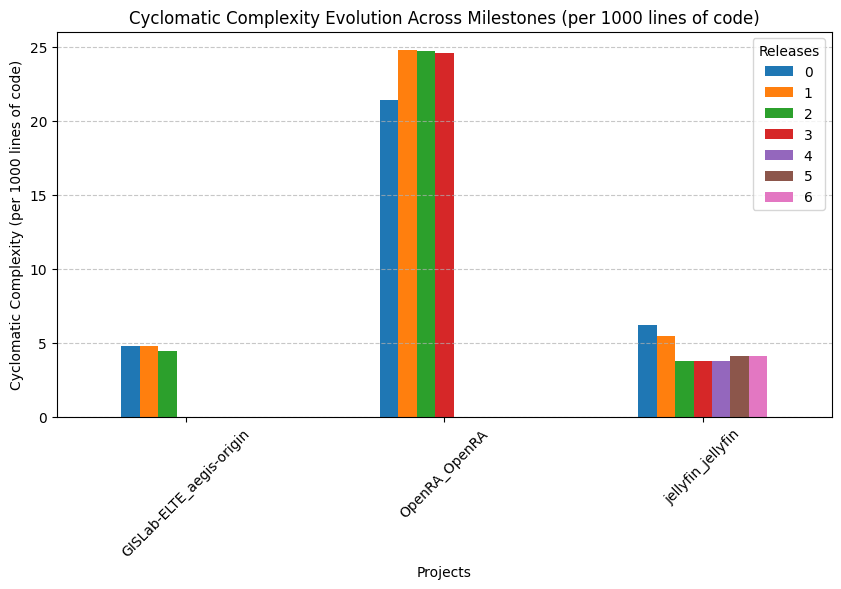

In [195]:
df_cyclomatic = df_cyclomatic / (df_cyclomatic.max() - df_cyclomatic.min())

# Plot
plt.figure(figsize=(10, 5))
df_cyclomatic_normalized.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Cyclomatic Complexity (per 1000 lines of code)")
plt.title("Cyclomatic Complexity Evolution Across Milestones (per 1000 lines of code)")
plt.legend(title="Releases")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

## Class coupling

### Bar chart

<Figure size 1000x500 with 0 Axes>

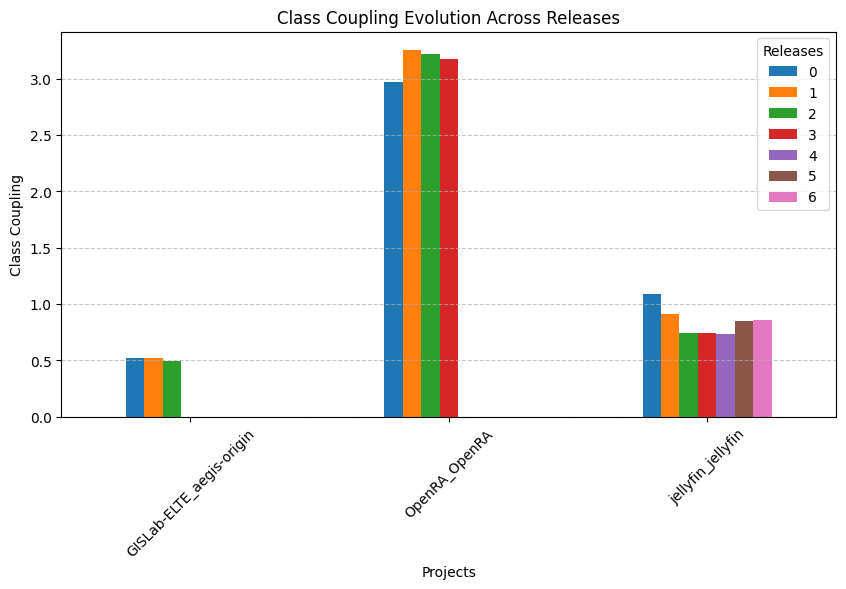

In [196]:
# Plot
plt.figure(figsize=(10, 5))
df_class_coupling_normalized.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Class Coupling")
plt.title("Class Coupling Evolution Across Releases")
plt.legend(title="Releases")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Line chart

<Figure size 1200x600 with 0 Axes>

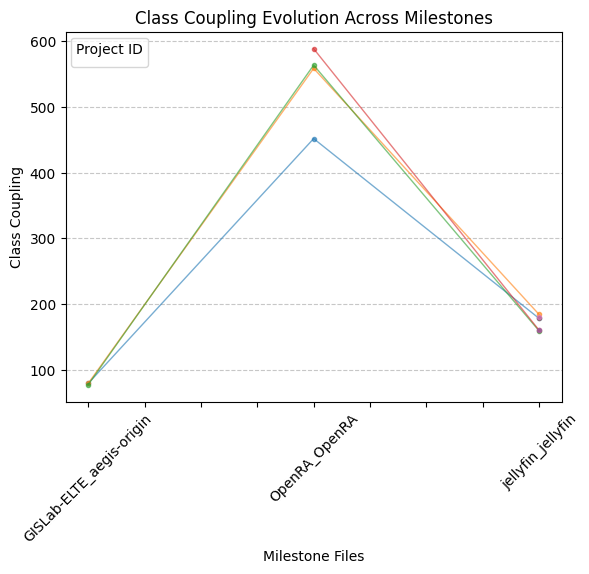

In [197]:
# Plot
plt.figure(figsize=(12, 6))
df_class_coupling.plot(kind='line', alpha=0.6, marker='o', markersize=3, linewidth=1)

# Labels and Title
plt.xlabel("Milestone Files")
plt.ylabel("Class Coupling")
plt.title("Class Coupling Evolution Across Milestones")
plt.xticks(rotation=45)
plt.legend([], title="Project ID", loc="upper left", fontsize="small")  # Hide legend for too many projects
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Line chart 2

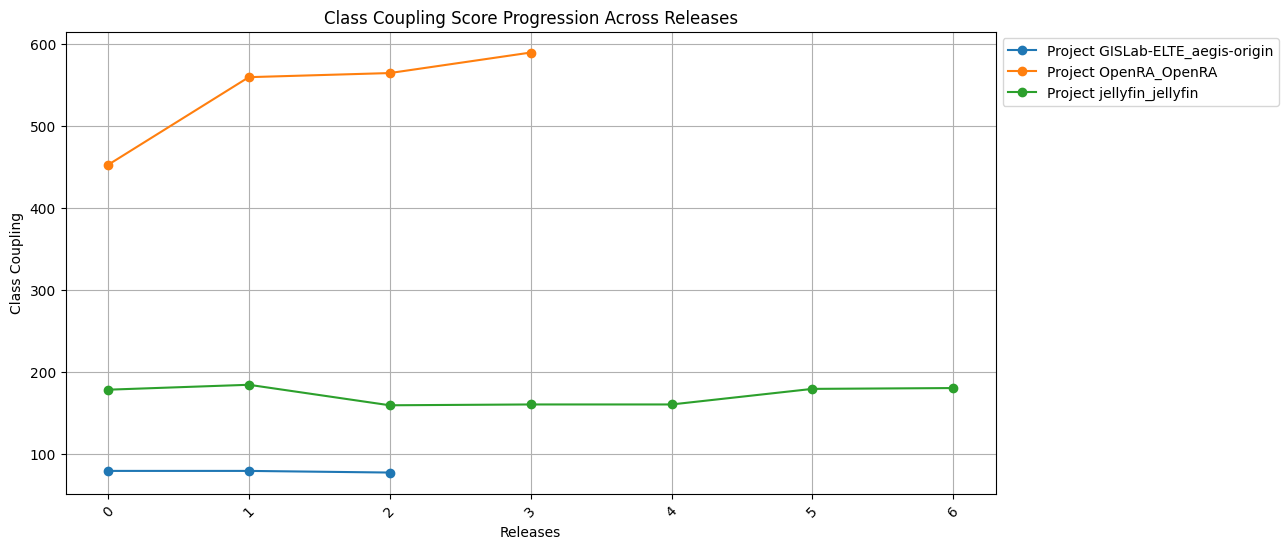

In [198]:
plt.figure(figsize=(12, 6))

for student_id, scores in df_class_coupling.iterrows():
    plt.plot(scores.index, scores.values, marker='o', linestyle='-', label=f"Project {student_id}")

plt.xlabel("Releases")
plt.ylabel("Class Coupling")
plt.title("Class Coupling Score Progression Across Releases")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.show()

### Heatmap

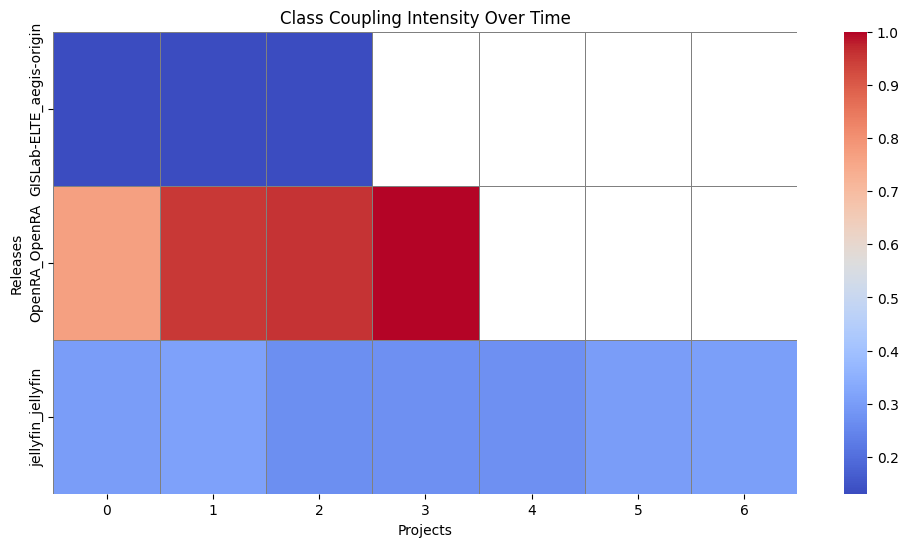

In [199]:
# Normalize values to improve visualization
df_normalized = df_class_coupling / df_class_coupling.max().max()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_normalized, cmap="coolwarm", linewidths=0.5, linecolor="gray")

# Labels
plt.xlabel("Projects")
plt.ylabel("Releases")
plt.title("Class Coupling Intensity Over Time")

# Show plot
plt.show()

### Normalized bar chart

<Figure size 1000x500 with 0 Axes>

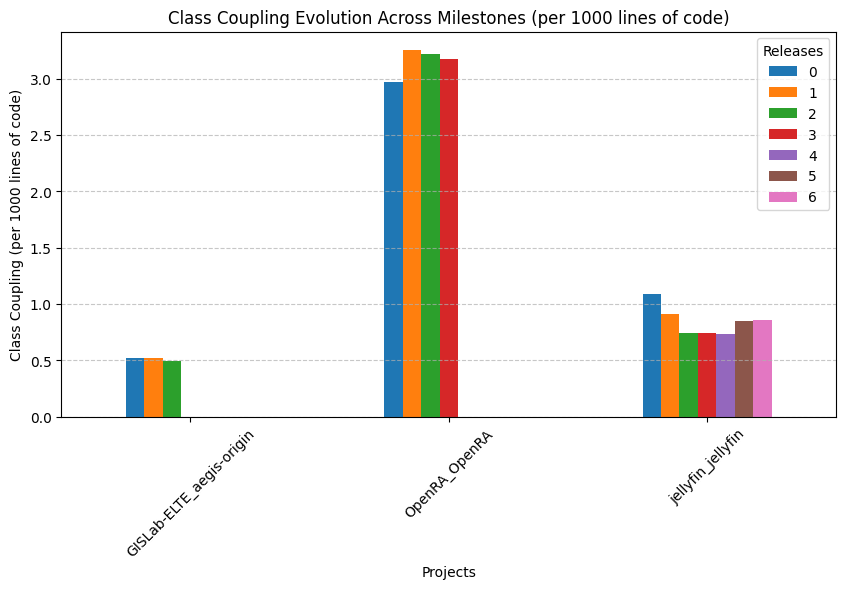

In [200]:
df_cyclomatic = df_cyclomatic / (df_cyclomatic.max() - df_cyclomatic.min())

# Plot
plt.figure(figsize=(10, 5))
df_class_coupling_normalized.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Class Coupling (per 1000 lines of code)")
plt.title("Class Coupling Evolution Across Milestones (per 1000 lines of code)")
plt.legend(title="Releases")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()